In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["figure.dpi"] = (100)

from math import *
import scipy.constants
from opc import *

In [2]:
f = 1.0e12
λ = scipy.constants.c/f
k = 2*pi*λ
zR = 1.0
w0 = sqrt(zR*λ/pi)
print(w0)

0.009768669468496662


In [3]:
help(SingleComponentBeam.GaussianBeamWaist)

Help on method GaussianBeamWaist in module opc:

GaussianBeamWaist(f, nx, ny, dx, dy, w0x, w0y) method of builtins.type instance
    Create a gaussian beam with width parameters w0x/w0y
    in horizontal/vertical direction.



λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.009768669468378371, 0.009768669468364863)
(0.009768669468496662, 0.009768669468496662)


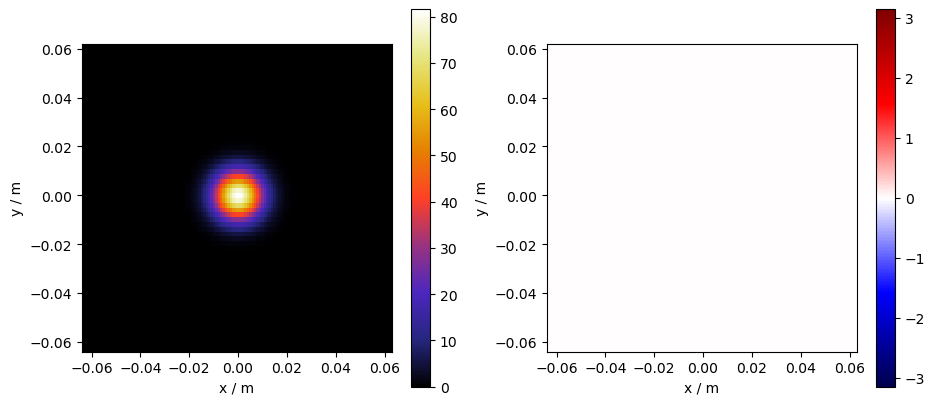

In [4]:
gbw = SingleComponentBeam.GaussianBeamWaist(f, 128, 64, 0.001, 0.002, w0, w0)
print(gbw.TotalPower())
print(gbw.FitSizeW(order=4, threshold=-3))
print(gbw.RMS_SizeW())
gbw.plot()
plt.show()

In [5]:
help(SingleComponentBeam.GaussianBeam)

Help on method GaussianBeam in module opc:

GaussianBeam(f, nx, ny, dx, dy, zR, z) method of builtins.type instance
    Create a gaussian beam with a Rayleigh range zR
    at a distance z from the waist (both polarization directions are equal).
    z cannot be exactly zero.



λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
1.0


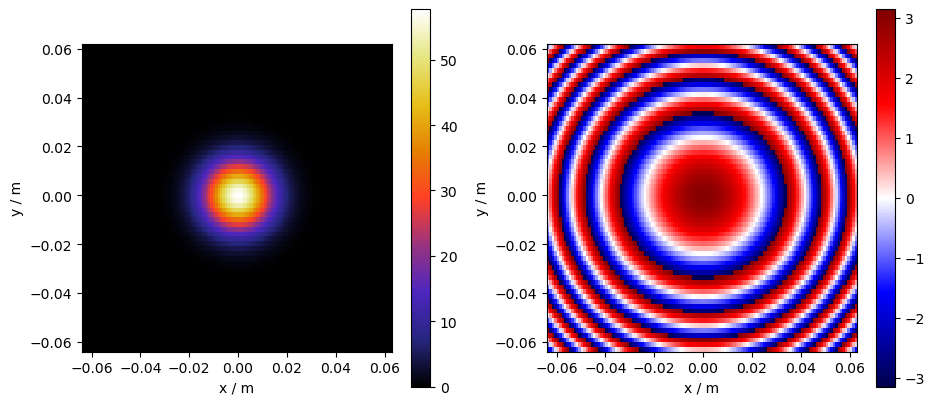

In [6]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
print(gb.TotalPower())
gb.plot()
plt.show()

1.0000000000000002
(0.013814984847910222, 0.013814984847918994)
(0.013814984848687952, 0.013814984848687952)


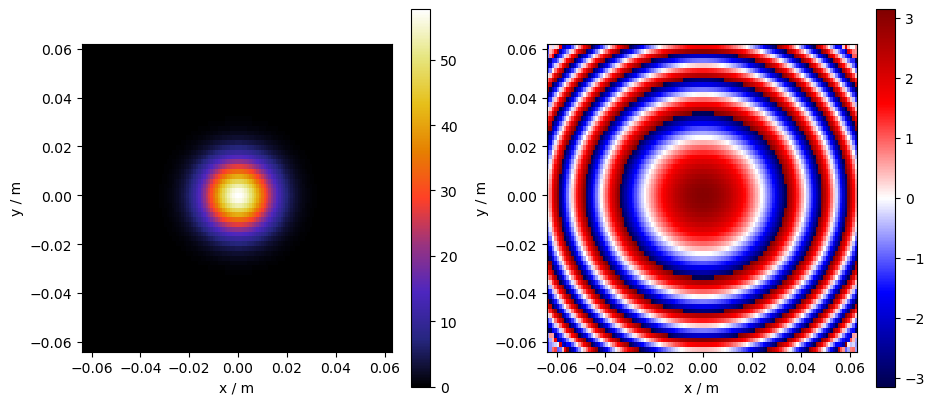

In [7]:
propagated = SingleComponentBeam.NearFieldProp(gbw,1.0)
print(propagated.TotalPower())
print(propagated.FitSizeW(order=4, threshold=-3))
print(propagated.RMS_SizeW())
propagated.plot()
plt.show()

0.0023421285781250003 0.0023421285781250003
1
(0.013814984847890371, 0.01381498484789039)
(0.013814984848687956, 0.013814984848687954)
0.004684257156250001 0.004684257156250001
1
(0.02184340897687624, 0.02184340897687622)
(0.021843408981285273, 0.02184340898128528)


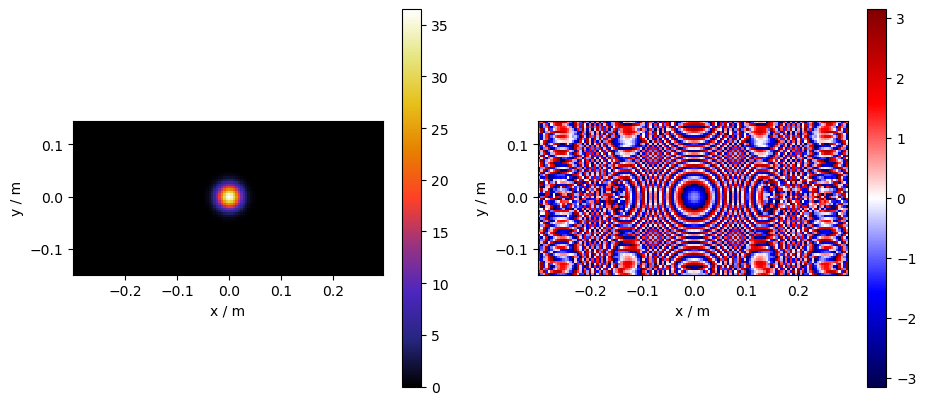

In [8]:
far = SingleComponentBeam.FarFieldProp(gbw,1.0)
print(far.dx, far.dy)
print("%g"%far.TotalPower())
print(far.FitSizeW(order=4, threshold=-3))
print(far.RMS_SizeW())
far = SingleComponentBeam.FarFieldProp(gbw,2.0)
print(far.dx, far.dy)
print("%g"%far.TotalPower())
print(far.FitSizeW(order=4, threshold=-3))
print(far.RMS_SizeW())
far.plot()
plt.show()

In [9]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 128, 64, 0.001, 0.002, w0, w0)
nf = SingleComponentBeam.NearFieldProp(gb,1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = SingleComponentBeam.NearFieldProp(gb,2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.013814984847910222, 0.013814984847918994)
1.0000000000000004
(0.013814984847890371, 0.01381498484789039)
1.0000000000000002
(0.021843409049125618, 0.02184340873102878)
1.0000000000000002
(0.02184340897687624, 0.02184340897687622)


In [10]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 64, 64, 0.002, 0.002, w0, w0)
nf = SingleComponentBeam.NearFieldProp(gb,1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = SingleComponentBeam.NearFieldProp(gb,2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.013814984847935538, 0.013814984847935642)
1.0000000000000004
(0.01381498484789037, 0.01381498484789039)
1.0000000000000002
(0.021843408734233686, 0.021843408734233613)
1.0000000000000002
(0.021843408976876238, 0.02184340897687622)


In [11]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 128, 128, 0.002, 0.002, w0, w0)
nf = SingleComponentBeam.NearFieldProp(gb,1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = SingleComponentBeam.NearFieldProp(gb,2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000004
(0.01381498484793554, 0.013814984847935646)
1.0000000000000004
(0.013814984847902756, 0.013814984847902794)
1.0
(0.021843408976695032, 0.021843408976694963)
1.0000000000000002
(0.021843408976744697, 0.02184340897674464)


In [12]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 128, 128, 0.001, 0.001, w0, w0)
nf = SingleComponentBeam.NearFieldProp(gb,1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = SingleComponentBeam.NearFieldProp(gb,2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = SingleComponentBeam.FarFieldProp(gb,2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000004
(0.013814984847908031, 0.013814984847908409)
1.0000000000000004
(0.013814984847890371, 0.013814984847890389)
1.0000000000000002
(0.021843409086913103, 0.021843409086913478)
1.0000000000000002
(0.02184340897687624, 0.021843408976876214)


0.002342362790982813 0.002342362790982813
1.0000000000000002
(0.013815675616320406, 0.013815675616320428)


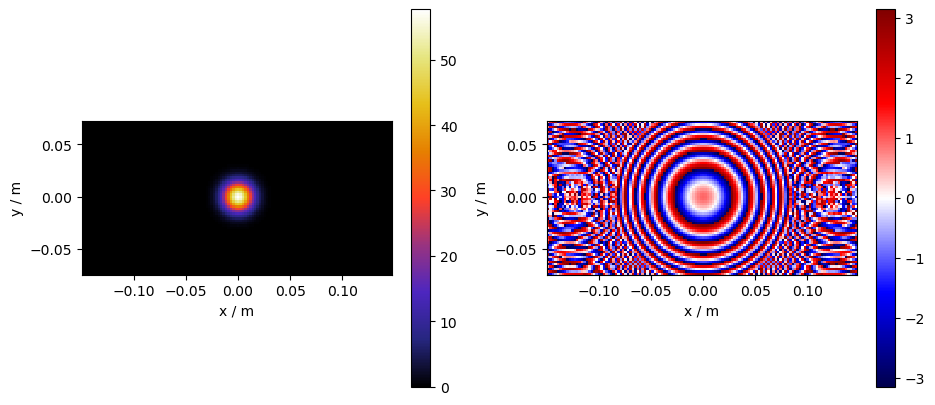

In [13]:
far = SingleComponentBeam.FarFieldProp(gbw,1.0001)
print(far.dx, far.dy)
print(far.TotalPower())
print(far.FitSizeW(order=4, threshold=-3))
far.plot()
plt.show()

1.0000000000000004


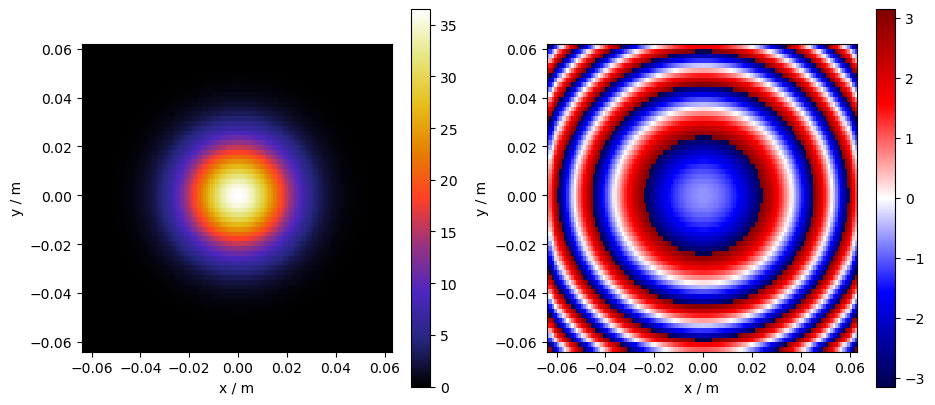

In [14]:
propagated = SingleComponentBeam.NearFieldProp(gbw,1.0)
p2 = SingleComponentBeam.NearFieldProp(propagated,1.0)
print(p2.TotalPower())
p2.plot()
plt.show()

λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
1.0000000000000002


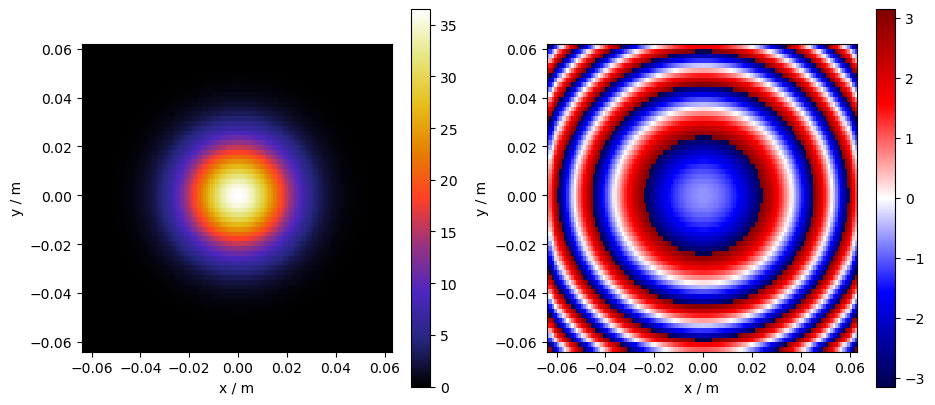

In [15]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
p3 = SingleComponentBeam.NearFieldProp(gb,1.0)
print(p3.TotalPower())
p3.plot()
plt.show()

λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
0.9999999999999998
(0.009768669467579677, 0.00976866946710372)
(0.00976866946849647, 0.009768669468496253)


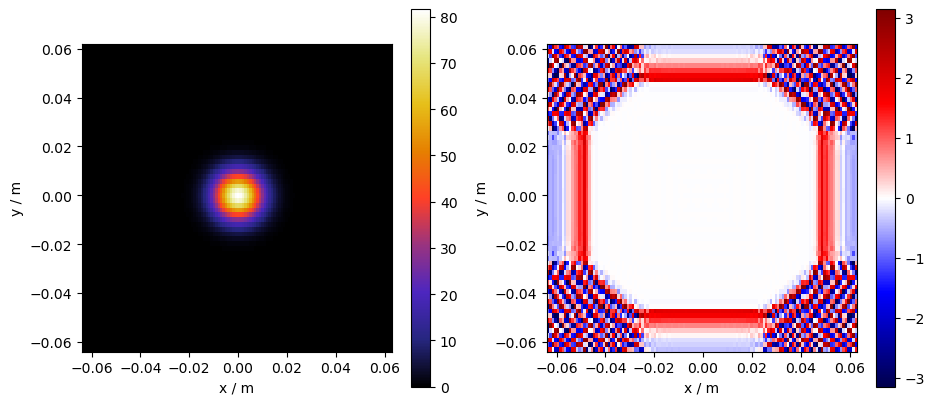

In [16]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
nf = SingleComponentBeam.NearFieldProp(gb,-1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
print(nf.RMS_SizeW())
nf.plot()
plt.show()

1.0
(-0.009768669467245106, -0.009768669467308054)
(0.009768669468496471, 0.009768669468496253)


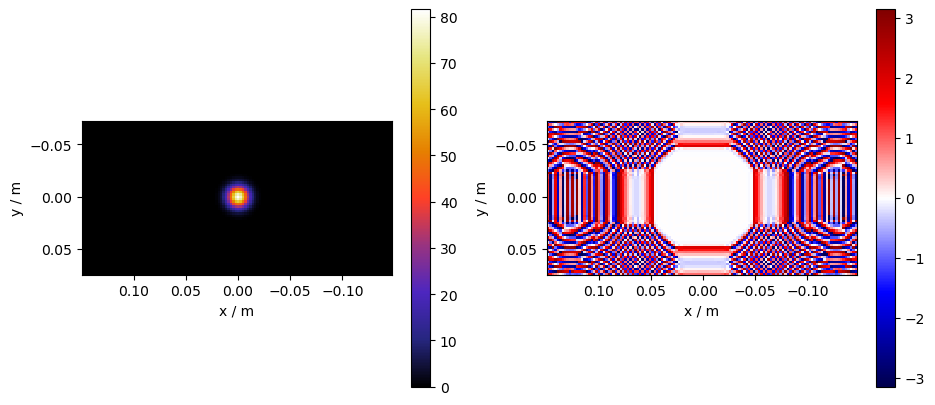

In [17]:
ff = SingleComponentBeam.FarFieldProp(gb,-1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
print(ff.RMS_SizeW())
ff.plot()
plt.show()